# **Data Cleaning and Imputation**

## **Why Missing Data is a Problem?**



Missing data can be a significant problem in various fields, including statistics, machine learning, and data analysis, due to several reasons:

1. **Bias in Results**: Missing data can lead to biased estimates, making statistical inferences incorrect or misleading. For example, if people with certain characteristics are more likely to have missing data, the analysis may not accurately represent the entire population.

2. **Loss of Information**: Missing values result in a loss of information, which reduces the statistical power of the data. This loss can lead to an inability to draw certain conclusions or detect real effects.

3. **Complications in Analysis**: Handling missing data often requires additional data processing steps, such as imputation (filling in missing values), which can complicate the analysis and potentially introduce new errors or biases.

4. **Limits on Analytical Methods**: Some statistical and machine learning methods cannot handle missing data directly. This limitation forces researchers to either exclude cases with missing data or to use methods that might not be ideal for their data structure or research question.

### Example to Understand the Impact of Missing Data

Imagine a medical study aiming to understand the factors influencing heart disease. The study collects various data, such as age, gender, blood pressure, cholesterol levels, and smoking habits. Suppose a significant portion of cholesterol level data is missing.

- **Bias**: If individuals with higher cholesterol levels are less likely to report their levels due to privacy concerns or other reasons, the study might underestimate the role of cholesterol in heart disease.
- **Statistical Power**: With missing cholesterol data, the study has less information to accurately determine the relationship between cholesterol and heart disease, potentially leading to weak or inconclusive results.
- **Complications in Analysis**: The researchers might need to use imputation methods to fill in the missing cholesterol values. The method chosen for imputation could influence the study's results, introducing another layer of complexity and potential bias.
- **Methodological Limitations**: If the researchers' preferred statistical method cannot handle missing data, they might need to exclude cases with missing cholesterol data, further reducing the study's sample size and representativeness.

In summary, missing data can significantly affect the quality and reliability of research findings. It's crucial to address and handle missing data appropriately to ensure accurate and reliable results.

In [1]:
import pandas as pd

df = pd.read_csv('ds_salaries_with_null_values.csv')
print(df.isna().sum())
df

Working_Year             0
Designation             30
Experience              30
Employment_Status       30
Employee_Location       30
Company_Size            30
Remote_Working_Ratio    30
Salary_USD              30
dtype: int64


,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,NaN,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50.0,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0
...,...,...,...,...,...,...,...,...
602,2022,NaN,Senior,NaN,US,M,100.0,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100.0,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0.0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100.0,143225.0


In [2]:
df['Remote_Working_Ratio'].unique()

array([ nan,   0.,  50., 100.])

## **Strategies for Addressing Missing Data**



Here are strategies for addressing missing data:

- **Drop Missing Values**: If missing values constitute 5% or less of the total values, it may be reasonable to simply drop these data points. This approach is straightforward but can lead to loss of information, especially if the missing values are not randomly distributed.

- **Impute Mean, Median, or Mode**: Depending on the distribution and context of the data, you can impute missing values using the mean, median, or mode. The mean is suitable for normally distributed data, while the median is better for skewed distributions. The mode is often used for categorical data.

- **Impute by Sub-group**: For more tailored imputation, consider the characteristics of sub-groups within the data. For instance, different experience levels might have varying median salaries. In such cases, imputing the median salary based on experience levels can provide more accurate and relevant replacements for missing values.

In [3]:
threshold = len(df) * 0.03
print(threshold)

cols_to_drop = df.columns[(df.isna().sum() > 0) & (df.isna().sum() <= threshold)]
print(cols_to_drop)

df.dropna(subset=cols_to_drop, inplace=True)

18.21
Index([], dtype='object')


**Imputing a summary statistics**

In [4]:
remote_working_ratio = df.groupby('Experience')['Remote_Working_Ratio'].median().to_dict()
df['Remote_Working_Ratio'] = df['Remote_Working_Ratio'].fillna(df['Experience'].map(remote_working_ratio))
df.dropna(subset=['Remote_Working_Ratio'], inplace=True)

cols_with_missing_values = df.columns[df.isna().sum() > 0]
print(cols_with_missing_values)

# Exclude Salary_USD column
for col in cols_with_missing_values[:-1]:
  df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isna().sum())

Index(['Designation', 'Experience', 'Employment_Status', 'Employee_Location',
       'Company_Size', 'Salary_USD'],
      dtype='object')
Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD              30
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          606 non-null    int64  
 1   Designation           606 non-null    object 
 2   Experience            606 non-null    object 
 3   Employment_Status     606 non-null    object 
 4   Employee_Location     606 non-null    object 
 5   Company_Size          606 non-null    object 
 6   Remote_Working_Ratio  606 non-null    float64
 7   Salary_USD            576 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 42.6+ KB


In [6]:
salaries_dict = df.groupby('Experience')['Salary_USD'].median().to_dict()

# Impute missing values in Salary_USD
df['Salary_USD'] = df.apply(
    lambda row: salaries_dict[row['Experience']] if pd.isnull(row['Salary_USD']) else row['Salary_USD'],
    axis=1
)

In [7]:
print(df.isna().sum())
df.info()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          606 non-null    int64  
 1   Designation           606 non-null    object 
 2   Experience            606 non-null    object 
 3   Employment_Status     606 non-null    object 
 4   Employee_Location     606 non-null    object 
 5   Company_Size          606 non-null    object 
 6   Remote_Working_Ratio  606 non-null    float64
 7   Salary_USD            606 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 42.6+ KB


## **Using the Planes.CSV file**

In [8]:
planes = pd.read_csv('planes.csv')
print(planes.isna().sum())

threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8508 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          8508 non-null   object 
 1   Date_of_Journey  8508 non-null   object 
 2   Source           8508 non-null   object 
 3   Destination      8508 non-null   object 
 4   Route            8508 non-null   object 
 5   Dep_Time         8508 non-null   object 
 6   Arrival_Time     8508 non-null   object 
 7   Duration         8508 non-null   object 
 8   Total_Stops      8508 non-null   object 
 9   Additional_I

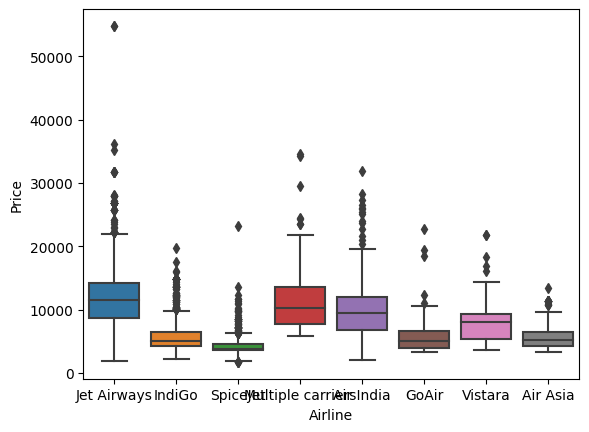

In [9]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())
print(planes.info())
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of Price by Airline
sns.boxplot(data=planes, y='Price', x="Airline")

plt.show()

In [10]:
planes.drop('Additional_Info', inplace=True, axis=1)

In [11]:
price_dict = planes.groupby('Airline')['Price'].median().to_dict()
print(price_dict)

# Impute missing values in Price
planes['Price'] = planes.apply(
    lambda row: price_dict[row['Airline']] if pd.isnull(row['Price']) else row['Price'],
    axis=1
)


{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}


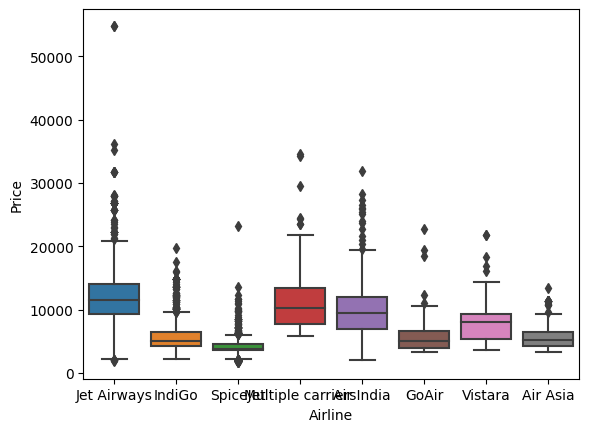

In [12]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, y='Price', x="Airline")

plt.show()

**Converting and analyzing categorical data**

In [13]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


In [14]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

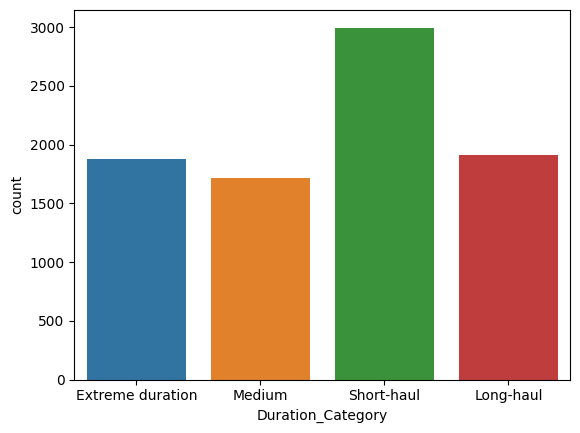

In [15]:
import numpy as np

# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

**Working with numeric data**

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
0    19.000000
1     5.416667
2     4.750000
3     2.416667
4    15.500000
Name: Duration, dtype: float64


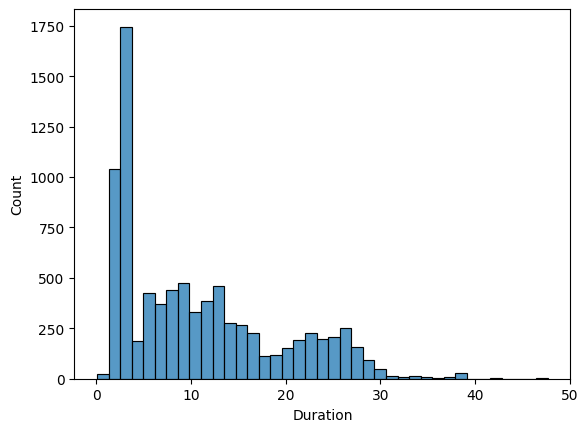

In [16]:
# Preview the column
print(planes["Duration"].head())

def convert_to_hours(duration_str):
    # Splitting the string into hours and minutes
    parts = duration_str.split(' ')
    hours = 0
    minutes = 0

    # Extract hours and minutes
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))

    # Convert the total duration to hours
    total_hours = hours + minutes / 60
    return total_hours

# Apply the conversion function to each row in the Duration column
planes['Duration'] = planes['Duration'].apply(convert_to_hours)

# Preview the column
print(planes["Duration"].head())

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(x='Duration', data=planes)
plt.show()

In [17]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
dtype: int64


In [18]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.333333                  3082
IndiGo             2.916667                   1632
Air India          15.500000                  1399
Multiple carriers  10.250000                   959
SpiceJet           2.500000                    653
Vistara            3.166667                    376
Air Asia           2.833333                    260
GoAir              2.916667                    147
dtype: int64


In [19]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
dtype: int64


### **Handling Outliers**

 An outlier is a data point that significantly differs from other observations in a dataset. Outliers can occur due to various reasons, including measurement or input errors, data processing mistakes, or they can be legitimate but extreme variations in the data. Identifying and handling outliers is crucial because they can have a disproportionate impact on statistical analyses, such as mean calculations, and can lead to misleading interpretations.

#### How to Identify Outliers:

1. **Statistical Methods**:
   - **Z-Score**: A Z-score measures how many standard deviations a data point is from the mean. A common threshold for identifying outliers is a Z-score of 3 or -3, indicating that the data point is three standard deviations away from the mean.
   - **IQR (Interquartile Range) Method**: The IQR is the difference between the 75th and 25th percentiles (Q3 and Q1). An outlier is often defined as a data point that is below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

2. **Visualization**:
   - **Box Plots**: Box plots visually display the distribution of data and are effective in highlighting outliers, which appear as points outside the whiskers of the box plot.
   - **Scatter Plots**: Helpful in identifying outliers in the context of a relationship between two variables.

#### How to Deal with Outliers:

1. **Investigation**:
   - First, investigate whether the outliers are due to errors (e.g., data entry errors) or if they are legitimate values. If they are errors, they should be corrected or removed.

2. **Removal**:
   - If the outliers are legitimate but are extreme values that could skew your analysis, you might choose to remove them. However, be cautious with this approach as it can lead to bias in your results.

3. **Transformation**:
   - Applying transformations (like log transformation) can reduce the effect of outliers. This approach is particularly useful when the data has a skewed distribution.

4. **Imputation**:
   - Replace outliers with values estimated using statistical methods (like the median or mean of the remaining data), especially if you suspect the outliers are due to errors.

It's important to note that the decision on how to deal with outliers should be guided by the context and purpose of your analysis. Outliers can provide valuable information about the data or the process being studied, and in some cases, removing them can lead to a loss of valuable insights.

In [20]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


# **Relationships in Data**

## **Patterns over time**

In [23]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)


divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


**You can also convert any column to datetime without parsing it while reading the file**

In [24]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])

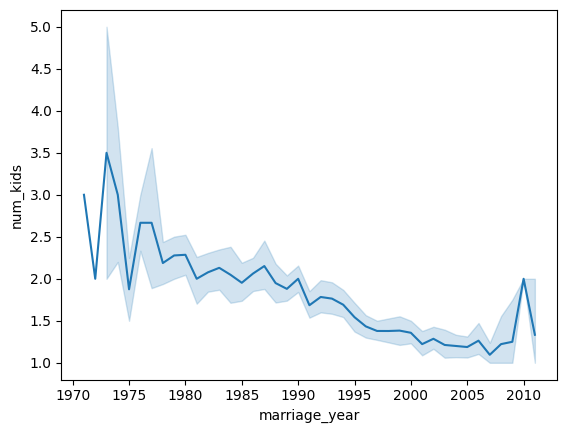

In [25]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y='num_kids')
plt.show()

## **Correlation**

Correlation is a statistical measure that describes the extent to which two variables change together. It quantifies the degree to which a change in one variable is associated with a change in another variable. Correlation coefficients can range from -1 to 1, with different values indicating different types of relationships:

1. **Positive Correlation (0 to +1)**:
   - **Meaning**: When the correlation coefficient is positive, it means that as one variable increases, the other variable also increases. Conversely, as one decreases, the other also decreases. The closer the coefficient is to +1, the stronger the positive relationship.
   - **Example**: Height and weight often have a positive correlation. Generally, taller people tend to weigh more.

2. **Negative Correlation (-1 to 0)**:
   - **Meaning**: A negative correlation indicates that as one variable increases, the other decreases, and vice versa. The closer the coefficient is to -1, the stronger the negative relationship.
   - **Example**: The relationship between the amount of time spent studying and the number of errors made on a test might be negatively correlated; as study time increases, the number of errors might decrease.

3. **Zero Correlation (Around 0)**:
   - **Meaning**: A correlation coefficient close to zero suggests that there is no linear relationship between the two variables. However, it's important to note that zero correlation does not necessarily mean there is no relationship at all; there could be a non-linear relationship.
   - **Example**: The number of hours it rains in a day and a person's height would have zero correlation; there’s no linear relationship between these two variables.

It's important to note that correlation does not imply causation. A correlation between two variables does not automatically mean that one variable causes the change in the other. The relationship could be coincidental, or there could be another factor influencing both variables.

Correlation is often measured using Pearson's correlation coefficient for linear relationships, but other types of correlation coefficients (like Spearman's rank correlation) are used for non-parametric or non-linear relationships.

## **Pair Plot**

A pairplot, also known as a scatterplot matrix, is a useful tool in data visualization for examining the pairwise relationships between multiple variables in a dataset. It helps in visually assessing potential correlations between variables. While a pairplot does not provide a numerical value for correlation, it allows you to observe the nature of relationships (if any) between pairs of variables. Here’s how you can determine correlation using a pairplot:

1. **Plot Creation**: In Python, you can use the seaborn library to create a pairplot. This will generate a matrix of scatterplots, where each scatterplot shows the relationship between two variables.

    ```python
    import seaborn as sns
    sns.pairplot(data)
    ```

2. **Identifying Positive Correlation**: In the pairplot, if the scatterplot for two variables shows a pattern where points tend to go upwards from left to right, this suggests a positive correlation. The tighter and more linear this pattern, the stronger the positive correlation.

3. **Identifying Negative Correlation**: Conversely, if the scatterplot shows a pattern where points tend to go downwards from left to right, this indicates a negative correlation. A tighter and more linear pattern denotes a stronger negative correlation.

4. **Identifying Zero or No Correlation**: If the scatterplot shows a cloud of points spread randomly with no discernible pattern or direction, this suggests little to no correlation between those two variables.

5. **Observing Non-Linear Relationships**: Sometimes, you might notice a pattern that is not linear (e.g., curved patterns, clusters). This suggests a non-linear relationship that might not be captured well by standard correlation coefficients.

6. **Additional Insights**: Pairplots often include histograms or density plots along the diagonal, which show the distribution of each individual variable. This can provide additional insights into the nature of each variable.

It’s important to remember that pairplots and visual inspections can provide an initial understanding of relationships but are subjective. They are typically used as a preliminary step in data analysis, often followed by more quantitative methods like calculating Pearson or Spearman correlation coefficients for a more precise understanding of these relationships.

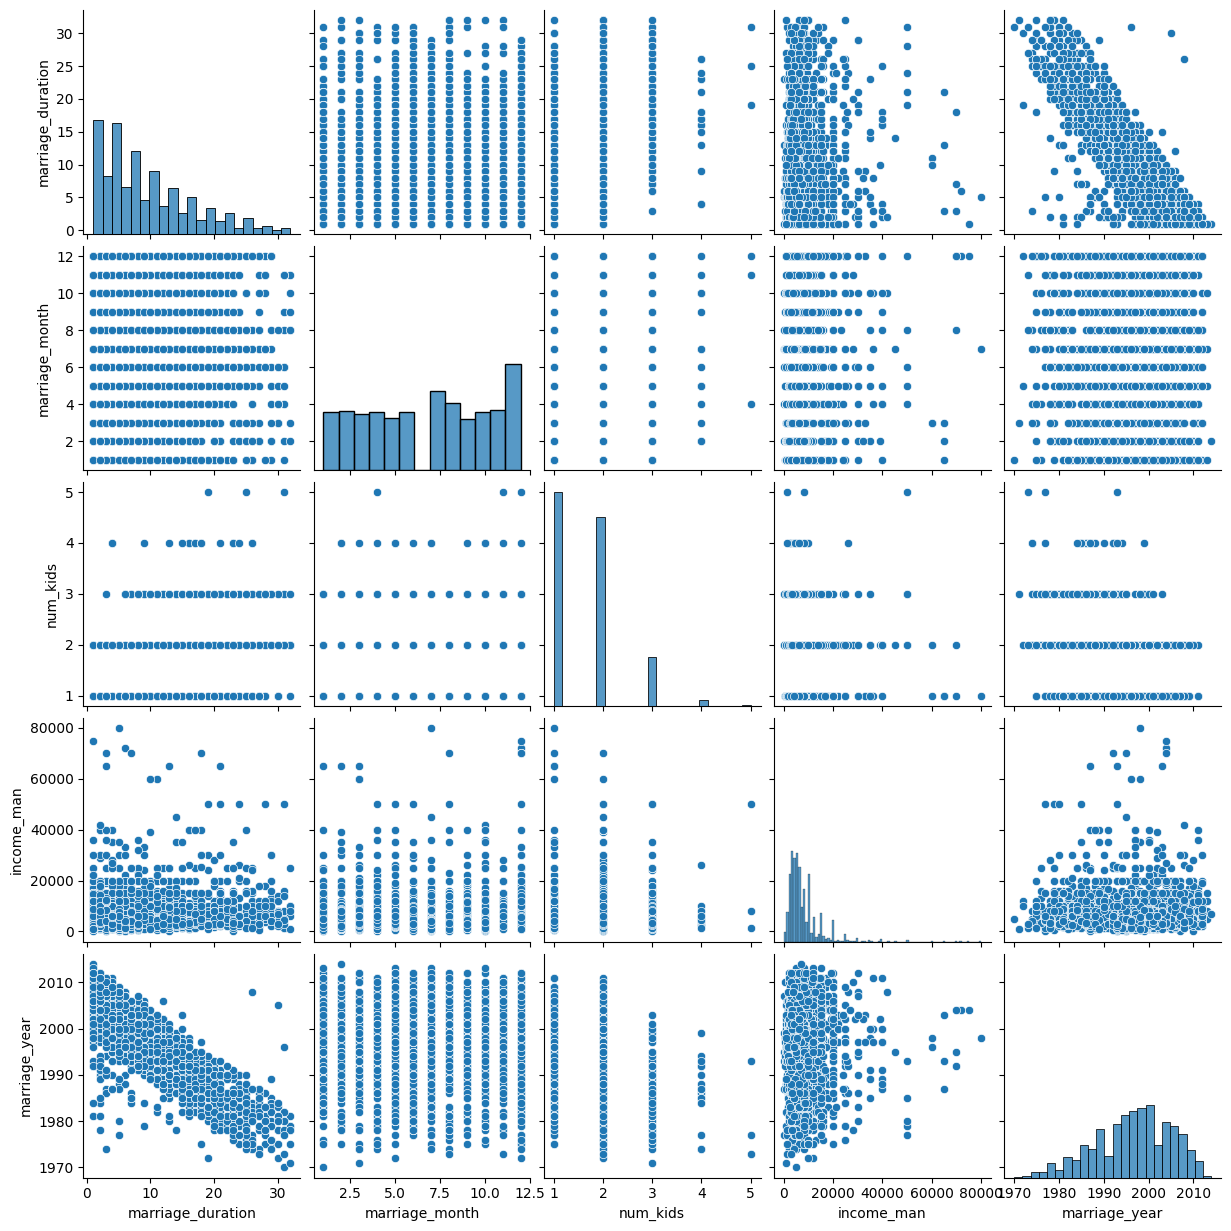

In [29]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
sns.pairplot(divorce, vars=["marriage_duration", 'marriage_month', 'num_kids', 'income_man', 'marriage_year'])
plt.show()

## **Relationship in categorical data**

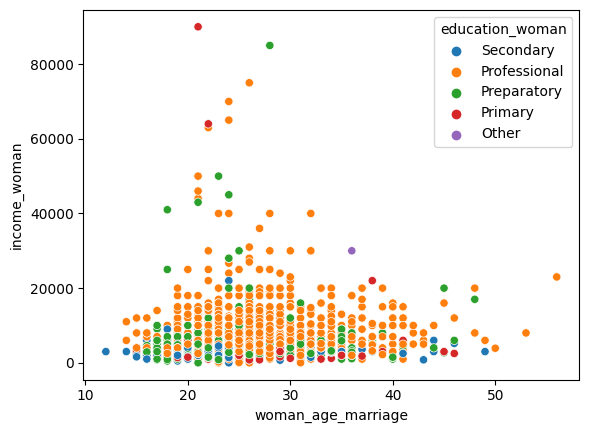

In [30]:
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y='income_woman', hue="education_woman")
plt.show()

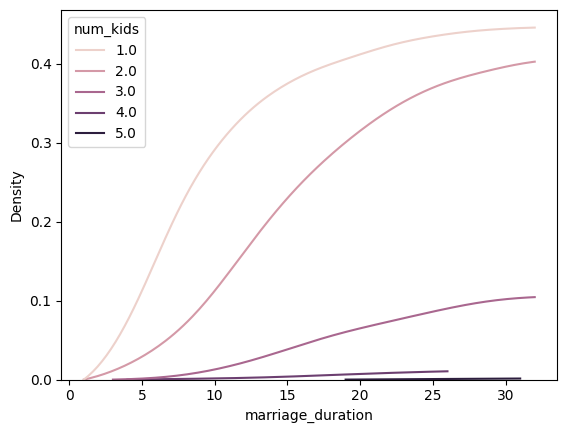

In [32]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

It looks as though there is a positive correlation between longer marriages and more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable our findings are.

# **Tuning Exploratory Analysis into Action**

**Cross Tabing**

In [33]:
salaries = pd.read_csv('ds_salaries_clean.csv')

# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))


# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))


KeyError: ignored

**Extracting Features For Correlation**

In [ ]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

In [ ]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

In [ ]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

By using pd.cut() to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid "entry" level salaries, while more staff at medium-sized companies are rewarded with "senior" level salary. Now let's look at generating hypotheses as you reach the end of the EDA phase!

**Generating Hypothesis**

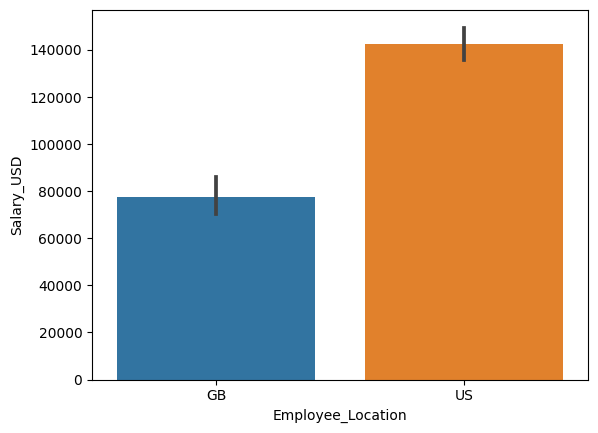

In [35]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()


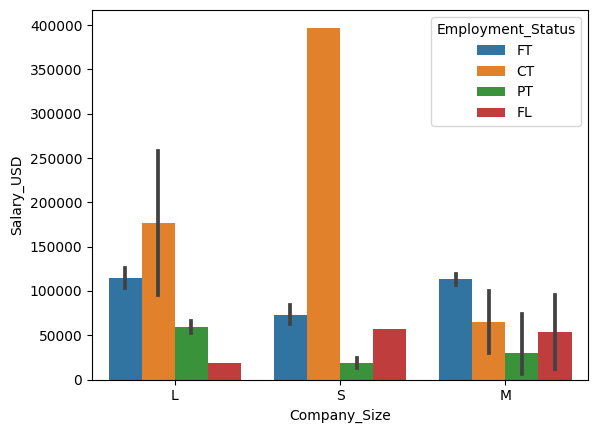

In [36]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, y="Salary_USD", x="Company_Size", hue="Employment_Status")
plt.show()